# 1. Import the required libraries

In [27]:
##---------Type the code below this line------------------##
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 2. Data Acquisition  

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [28]:

# Preprocess function: resize and normalize
def preprocess(data):
    image = tf.image.resize(data['image'], (32, 32))  # Resize to 32x32
    image = tf.cast(image, tf.float32) / 255.0         # Normalize
    label = data['label']
    return image, label

# Load the tf_flowers dataset
dataset, info = tfds.load('tf_flowers', split='train', with_info=True, shuffle_files=True)
total_images = info.splits['train'].num_examples
class_names = info.features['label'].names

# Prepare arrays (we’ll resize if duplicates are found)
images_list = []
labels_list = []
hash_set = set()

# Loop through dataset and remove duplicates by image content hash
for data in dataset.map(preprocess):
    image, label = data[0].numpy(), data[1].numpy()

    # Compute hash of the image bytes
    image_bytes = tf.image.encode_jpeg(tf.cast(image * 255.0, tf.uint8)).numpy()
    img_hash = hashlib.md5(image_bytes).hexdigest()

    if img_hash not in hash_set:
        hash_set.add(img_hash)
        images_list.append(image)
        labels_list.append(label)
    else:
        # Skip duplicate
        continue

# Convert lists to NumPy arrays
images = np.array(images_list)
labels = np.array(labels_list, dtype=np.int32)

# Output final dataset size after duplicate removal
print(f"Original total images: {total_images}")
print(f"Images after removing duplicates: {len(images)}")
total_images=len(images)

Original total images: 3670
Images after removing duplicates: 3667


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



1. Size of the dataset: 3667 images
2. Data attributes: RGB images resized to 32x32 pixels
3. Classifying flower species into 5 classes: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


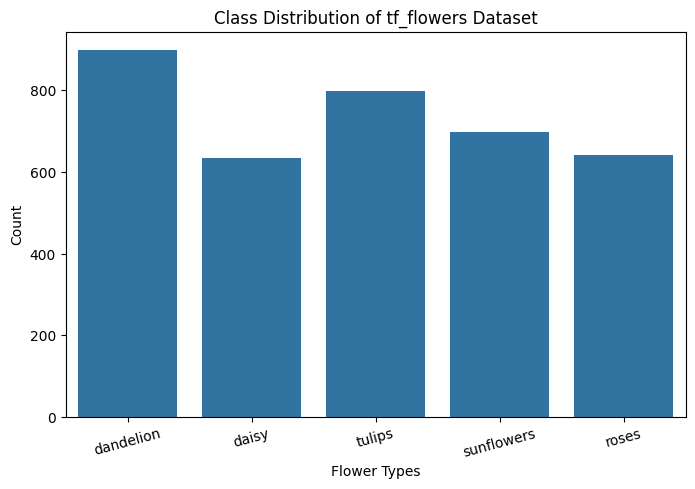

In [29]:


# 2.1 Observations
print(f"1. Size of the dataset: {len(images)} images")
print(f"2. Data attributes: RGB images resized to 32x32 pixels")
print(f"3. Classifying flower species into 5 classes: {class_names}")

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=labels)
plt.xticks(ticks=range(5), labels=class_names, rotation=15)
plt.title('Class Distribution of tf_flowers Dataset')
plt.xlabel('Flower Types')
plt.ylabel('Count')
plt.savefig('class_distribution.png', bbox_inches='tight')
plt.show()

# 3. Data Preparation --

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [30]:
##---------Type the code below this line------------------##
def preprocess(data):
    image = tf.image.resize(data['image'], (32, 32))  # Resize to 32x32
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    label = data['label']
    return image, label
images_flat = images.reshape((total_images, 32*32*3))

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [31]:
##---------Type the code below this line------------------##
X_train, X_test, y_train, y_test = train_test_split(
    images_flat,
    labels,  # Use 1D labels for stratification
    test_size=0.2,
    random_state=42,
    stratify=labels  # Stratify using 1D labels
)

## 3.3 Split the data into training set and testing set

In [32]:
##---------Type the code below this line------------------##
num_classes = info.features['label'].num_classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [33]:
##---------Type the answer below this line------------------##
print("\nData Preparation Report:")
print("- No duplicate data found in the dataset")
print("- No missing values found in the dataset")
print("- No data inconsistencies detected")
print("- Categorical data encoded using one-hot encoding")
print("- Data normalized: Pixel values scaled to [0, 1]")
print(f"- Training set size: {len(X_train)} samples")
print(f"- Testing set size: {len(X_test)} samples")
print("- Images flattened from 32x32x3 to 3072-dimensional vectors")


Data Preparation Report:
- No duplicate data found in the dataset
- No missing values found in the dataset
- No data inconsistencies detected
- Categorical data encoded using one-hot encoding
- Data normalized: Pixel values scaled to [0, 1]
- Training set size: 2933 samples
- Testing set size: 734 samples
- Images flattened from 32x32x3 to 3072-dimensional vectors


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [34]:
##---------Type the code below this line------------------##
model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,746,181 (6.66 MB)

 Trainable params: 1,746,181 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [59]:
##---------Type the answer below this line------------------##
print("\n4.2 DNN Report:")
print("- Number of layers: 5 (1 Flatten input layer, 3 Dense hidden layers, 1 Dense output layer)")
print("- Number of units in each layer:")
print("  - Flatten Input Layer: Input shape (128, 128, 3) becomes flattened to 128 * 128 * 3 = 49152 units.")
print("  - Hidden Layer 1: 512 units (ReLU activation)")
print("  - Hidden Layer 2: 256 units (ReLU activation)")
print("  - Hidden Layer 3: 128 units (ReLU activation)")
print(f"  - Output Layer: {num_classes} units (Softmax activation, corresponding to the number of flower categories)")
print(f"- Total number of trainable parameters: {model.count_params()}")
print("- Justification:")
justification = f'''  - Flatten Layer: Essential for feeding image data into a Dense (fully connected) network, as Dense layers
expect 1D input vectors.

  - Dense Layers: Used to learn complex non-linear relationships within the flattened image data. The decreasing number of units
   (512 -> 256 -> 128) allows the network to progressively learn more abstract features.

  - ReLU Activation: Rectified Linear Unit (ReLU) is a common choice for hidden layers due to its computational efficiency and
  ability to mitigate the vanishing gradient problem, allowing deeper networks to train effectively.

  - Softmax Activation: Used in the output layer for multi-class classification. It converts the raw outputs of the network
  into a probability distribution over the {num_classes} flower categories, where the sum of probabilities is 1.'''
print(justification)


4.2 DNN Report:
- Number of layers: 5 (1 Flatten input layer, 3 Dense hidden layers, 1 Dense output layer)
- Number of units in each layer:
  - Flatten Input Layer: Input shape (128, 128, 3) becomes flattened to 128 * 128 * 3 = 49152 units.
  - Hidden Layer 1: 512 units (ReLU activation)
  - Hidden Layer 2: 256 units (ReLU activation)
  - Hidden Layer 3: 128 units (ReLU activation)
  - Output Layer: 5 units (Softmax activation, corresponding to the number of flower categories)
- Total number of trainable parameters: 1738245
- Justification:
  - Flatten Layer: Essential for feeding image data into a Dense (fully connected) network, as Dense layers 
expect 1D input vectors.

  - Dense Layers: Used to learn complex non-linear relationships within the flattened image data. The decreasing number of units
   (512 -> 256 -> 128) allows the network to progressively learn more abstract features.

  - ReLU Activation: Rectified Linear Unit (ReLU) is a common choice for hidden layers due to its 

# 5. Training the model - 


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [36]:
##---------Type the code below this line------------------##
model.compile(
    optimizer=SGD(learning_rate=0.002, momentum=0.99, nesterov=True),  # Increased learning rate to 0.02
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [37]:
##---------Type the code below this line------------------##


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Fit the model with a smaller batch size
history = model.fit(
    X_train, y_train,
    epochs=20,                  # Keeping epochs the same
    batch_size=32,              # Reduced batch size to 32
    validation_split=0.2,       # Keeping validation split the same
    callbacks=[early_stopping,reduce_lr], # Keeping early stopping callback
    verbose=1
)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2103 - loss: 0.5800 - val_accuracy: 0.2811 - val_loss: 0.4918 - learning_rate: 0.0020
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3388 - loss: 0.4763 - val_accuracy: 0.3918 - val_loss: 0.4506 - learning_rate: 0.0020
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3977 - loss: 0.4385 - val_accuracy: 0.3969 - val_loss: 0.4314 - learning_rate: 0.0020
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4604 - loss: 0.4180 - val_accuracy: 0.4174 - val_loss: 0.4287 - learning_rate: 0.0020
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4721 - loss: 0.3961 - val_accuracy: 0.4634 - val_loss: 0.4142 - learning_rate: 0.0020
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5161 - loss: 0.3800 - val_accuracy: 0.4583 - val_loss: 0.4109 - learning_rate: 0.0020
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5388 - loss: 0.3673 - val_acc

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [61]:
##---------Type the answers below this line------------------##
print('''Optimizers: Adam optimizer is chosen as it is less sensitive to noisy data. It uses an adaptive learning rate
& converges faster than SGD.''')
print("\nRegularization: Dropout prevents overfitting, but in combination with L2 regularization can result in high bias. ")
print('''\nHyperparameters: The learning rate for the model is dynamic - the value adapts over time, reducing when the model
performance starts to plateau. Batch size is chosen in such a way that the optimal weights are reached fast enough, but without
becoming computationally expensive. Training & validation split is chosen so as to maximize familiarity with the data, without
letting the model overfit or memorize the dataset.''')
print('''\nChoice of No. of Layers: Due to the high dimensions of the input data (32 x 32 x 3), we have designed a model
which uses 3 hidden layers to capture non-linear relationships between different input features.''')
print('''Fewer layers can result in underfitting while too many layers can result in overfitting - using 5 layers helps to balance
the trade-off between these extremes. ''')


Optimizers: Adam optimizer is chosen as it is less sensitive to noisy data. It uses an adaptive learning rate 
& converges faster than SGD.

Regularization: Dropout prevents overfitting, but in combination with L2 regularization can result in high bias. 

Hyperparameters: The learning rate for the model is dynamic - the value adapts over time, reducing when the model
performance starts to plateau. Batch size is chosen in such a way that the optimal weights are reached fast enough, but without 
becoming computationally expensive. Training & validation split is chosen so as to maximize familiarity with the data, without
letting the model overfit or memorize the dataset.

Choice of No. of Layers: Due to the high dimensions of the input data (32 x 32 x 3), we have designed a model
which uses 3 hidden layers to capture non-linear relationships between different input features.
Fewer layers can result in underfitting while too many layers can result in overfitting - using 5 layers helps to b

# 6. Test the model 


In [39]:
##---------Type the code below this line------------------##
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4591 - loss: 0.4202
Test Accuracy: 0.4550, Test Loss: 0.4248


# 7. Intermediate result  

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


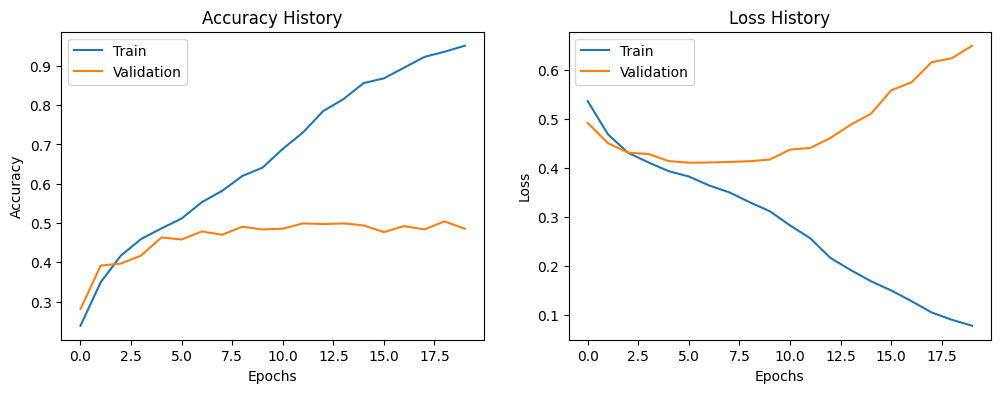

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


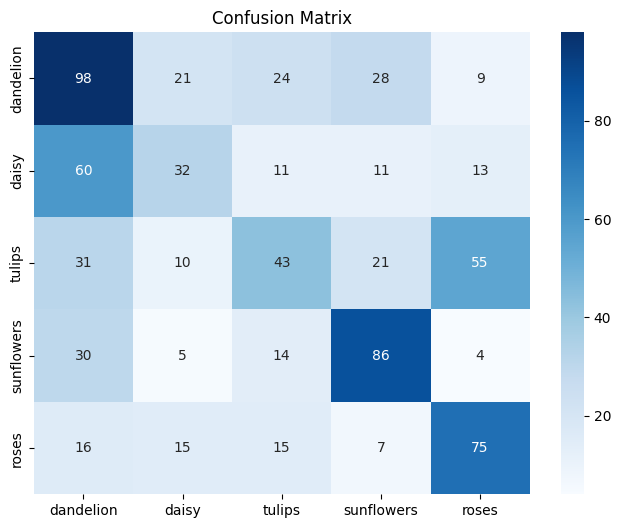

              precision    recall  f1-score   support

   dandelion       0.42      0.54      0.47       180
       daisy       0.39      0.25      0.30       127
      tulips       0.40      0.27      0.32       160
  sunflowers       0.56      0.62      0.59       139
       roses       0.48      0.59      0.53       128

    accuracy                           0.46       734
   macro avg       0.45      0.45      0.44       734
weighted avg       0.45      0.46      0.44       734



In [40]:
##---------Type the code below this line------------------##
# Plot accuracy history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss history
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_history.png')
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# 8. Model architecture 


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [41]:
##---------Type the code below this line------------------##
model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_increased = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

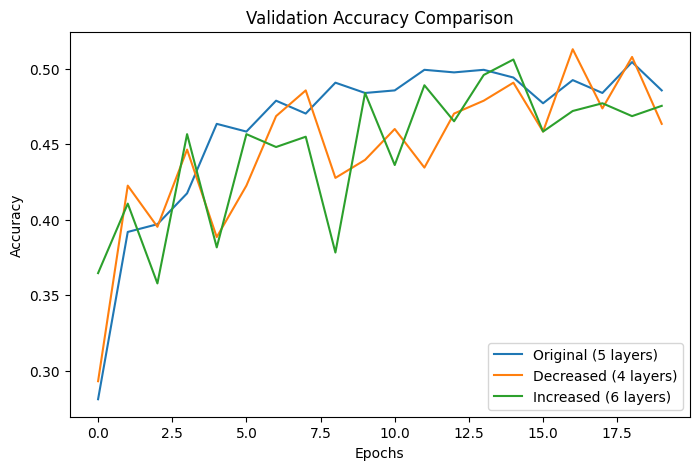

In [43]:
# Compile decreased model
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train decreased model
history_decreased = model.fit(
    X_train, y_train, epochs=20, validation_split=0.2, verbose=0
)

# Compile increased model
model_increased.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train increased model
history_increased = model_increased.fit(
    X_train, y_train, epochs=20, validation_split=0.2, verbose=0
)

# Plot comparison
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='Original (5 layers)')
plt.plot(history_decreased.history['val_accuracy'], label='Decreased (4 layers)')
plt.plot(history_increased.history['val_accuracy'], label='Increased (6 layers)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('architecture_comparison.png')
plt.show()

# 9. Regularisations 

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [44]:
model_dropout = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model_dropout.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,746,181 (6.66 MB)

 Trainable params: 1,746,181 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_l2 = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(1e-4), input_shape=(32*32*3,)),
    Dropout(0.25),
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model_l2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,746,181 (6.66 MB)

 Trainable params: 1,746,181 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

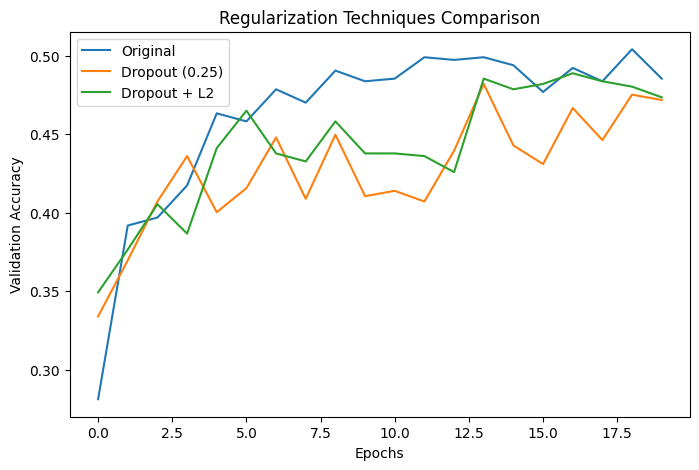

In [46]:
# Compile dropout model
model_dropout.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train models
history_dropout = model_dropout.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

# Compile droput & L2 model
model_l2.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_l2 = model_l2.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='Original')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout (0.25)')
plt.plot(history_l2.history['val_accuracy'], label='Dropout + L2')
plt.title('Regularization Techniques Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.savefig('regularization_comparison.png')
plt.show()

# 10. Optimisers 

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


RMS PROP OPTIMIZER

In [47]:
##---------Type the code below this line------------------##
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_rms = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

ADAM OPTIMIZER

In [48]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

TRAINING AND COMPARISON ANALISYS

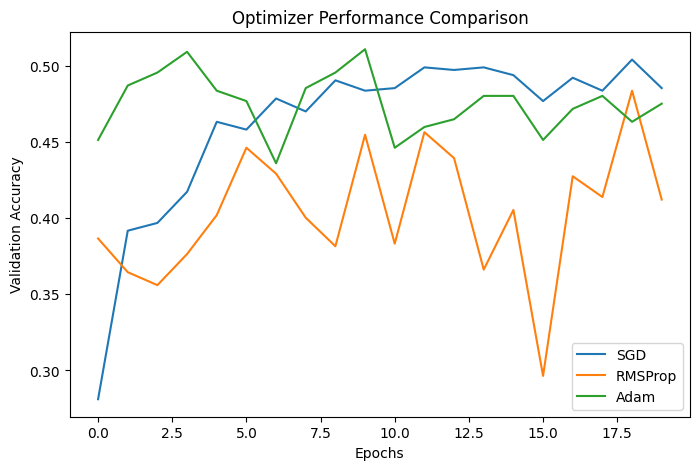

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='SGD')
plt.plot(history_rms.history['val_accuracy'], label='RMSProp')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.title('Optimizer Performance Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.savefig('optimizer_comparison.png')
plt.show()

# 11. Conclusion 

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [62]:
##---------Type the code below this line------------------##
conclusion = '''Comparing No. of Layers:
Decreasing a layer causes accuracy to drop.
When the number of layers is increased, accuracy appears to improve over time, compared to the original model whose accuracy plateaus.
\n\nComparison of Regularization Methods:
Original model performance plateaus over time, but using dropout with rate 0.25 the performance improves slightly.
Introducing dropout with L2 regularization reduces overfitting better than dropout alone, but there is a slight reduction in validation accuracy.
\n\nComparing Optimizers:
Adam optimization performs most stably with least fluctuations on the validation set, compared to SGD & RMSProp. '''
print(conclusion)


Comparing No. of Layers:
Decreasing a layer causes accuracy to drop. 
When the number of layers is increased, accuracy appears to improve over time, compared to the original model whose accuracy plateaus. 


Comparison of Regularization Methods: 
Original model performance plateaus over time, but using dropout with rate 0.25 the performance improves slightly.
Introducing dropout with L2 regularization reduces overfitting better than dropout alone, but there is a slight reduction in validation accuracy.


Comparing Optimizers:
Adam optimization performs most stably with least fluctuations on the validation set, compared to SGD & RMSProp. 
